# Network Analysis with NetworkX

#### [NetworkX](https://networkx.org) is a Python library for creating, analysing, and visulaising networks
* written in pure Python
* flexible and easy to install
* relatively scalable

#### Other Python libraries for network analysis geared towards performance
* [python-igraph](https://igraph.org/python/)  
    * written in C/C++ with interfaces to Python and R 
    * pros: performance and speed; cons: instalation can be a hurdle
* [graph-tool](https://graph-tool.skewed.de)
    * written in C++
    * fast algorithms and powerful visualisations

In [24]:
# Import networkx and other packages we will use

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats.stats import pearsonr

### Representations of an undirected network
Yang, Keller, Zheng. SAGE. 2016.

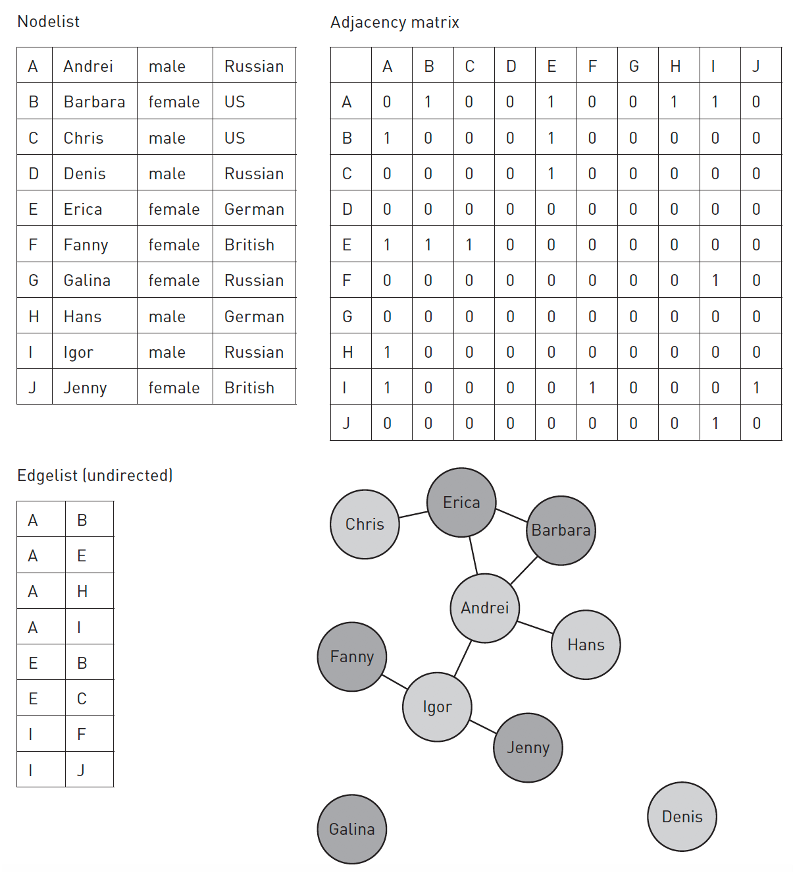

### Representations of a directed network
Yang, Keller, Zheng. SAGE. 2016.

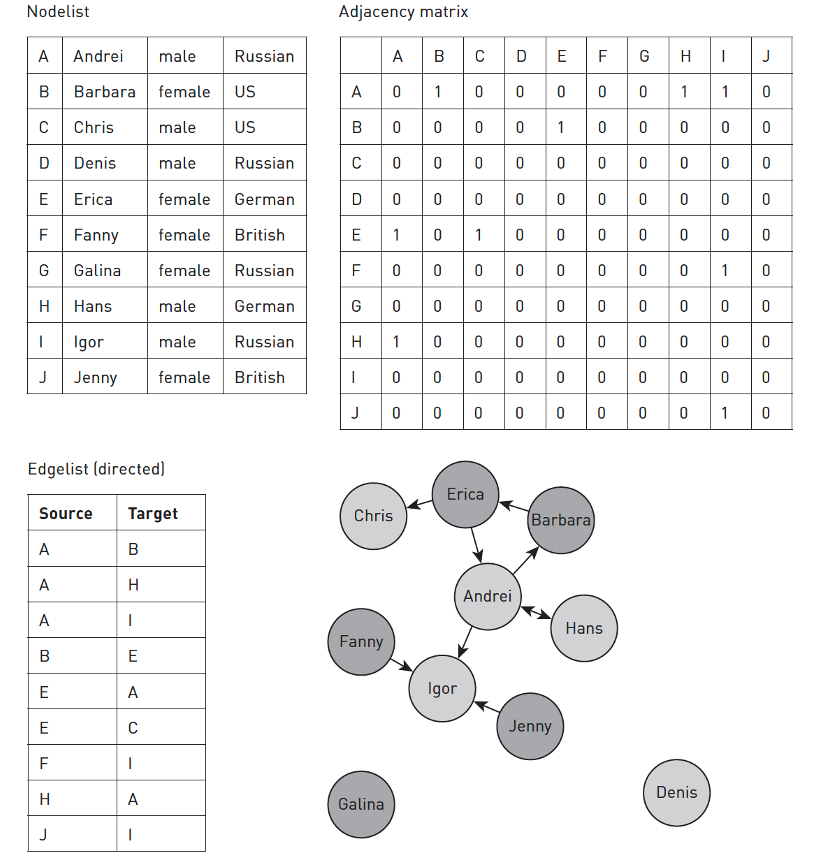

### Create a network

In [5]:
# Create an empty network
G = nx.Graph()
# G = nx.DiGraph() # Creates a directed network

# Add nodes
G.add_node(1)

# Or add a set of nodes from a list
G.add_nodes_from([2,3,4,5,6])

In [7]:
# Add edges
G.add_edge(1,2)
G.add_edge(2,4)

# Or add a set of edges from a list
G.add_edges_from([(1,4),(3,4),(1,5),(2,6),(5,6)])

In [8]:
# Check the created edges
G.edges()

EdgeView([(1, 2), (1, 4), (1, 5), (2, 4), (2, 6), (3, 4), (5, 6)])

In [9]:
# Check basic properties of the graph

print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 6
Number of edges: 7
Average degree:   2.3333


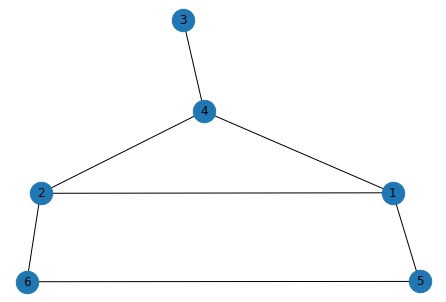

In [17]:
# Draw a network
nx.draw(G,with_labels=True, node_size=500)

In [21]:
# Basic network properties
print("node degree triangles clustering")
for v in nx.nodes(G):
    print(f"{v} {nx.degree(G,v)}, {nx.triangles(G,v)}, {nx.clustering(G,v)}")

node degree triangles clustering
1 3, 1, 0.3333333333333333
2 3, 1, 0.3333333333333333
3 1, 0, 0
4 3, 1, 0.3333333333333333
5 2, 0, 0
6 2, 0, 0


In [25]:
# Compute betweenness centrality
nx.betweenness_centrality(G, normalized=True)

{1: 0.25, 2: 0.25, 3: 0.0, 4: 0.4, 5: 0.05, 6: 0.05}

In [26]:
# Compute eigenvector centrality
nx.eigenvector_centrality(G)

{1: 0.5131199170225811,
 2: 0.5131199170225811,
 3: 0.18452474299639904,
 4: 0.4726682070377605,
 5: 0.3285964750170798,
 6: 0.3285964750170798}

### Add node attributes

In [27]:
# Add attributes to existing nodes
G.nodes[1]['gender'] = 'female'
G.nodes[2]['gender'] = 'female'
G.nodes[3]['gender'] = 'male'
G.nodes[4]['gender'] = 'male'
G.nodes[5]['gender'] = 'female'
G.nodes[6]['gender'] = 'female'


In [28]:
# Assign different colour to nodes with different attributes
node_color = ['#a5b41f' if G.nodes[v]["gender"] == "female"
    else '#1fb4a5' for v in G]

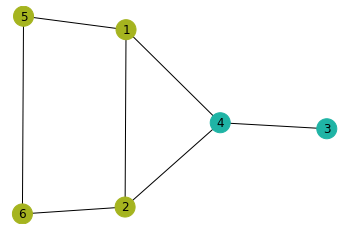

In [31]:
# Plot the network with node colours representing gender categories 
nx.draw_networkx(G, label=True, node_color=node_color, node_size=400)
plt.axis('off')
plt.show()

In [32]:
# Assortativity for node attributes — similarity of connections in the network with respect to the gender attribute
# "Similarity breeds connection" On homophily in social networks, see McPherson et al. Am. Soc. Rew. https://doi.org/10.1146/annurev.soc.27.1.415

nx.attribute_assortativity_coefficient(G, attribute='gender')

0.29999999999999977

In [33]:
# Assortativity for node degree

nx.degree_assortativity_coefficient(G)

-0.10526315789473836

### Directed network

In [34]:
# Create an empty directed network
DG = nx.DiGraph()

# Add nodes
DG.add_nodes_from([1, 2, 3, 4, 5, 6])

# Add edges
DG.add_edges_from([(1, 2),(2, 4),(1, 4), (3, 4), (1, 5), (2, 6), (5,6)])

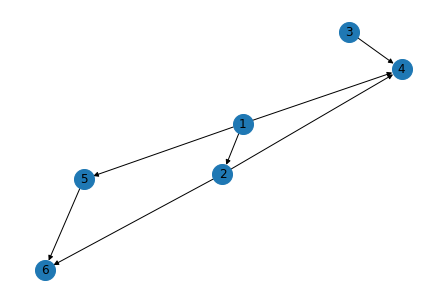

In [40]:
# Draw the directed network

nx.draw(DG, with_labels=True,node_size=400)

In [38]:
# Basic network properties

DG.in_degree()
# basic network roperties
print("node out_degree out_degree")
for v in nx.nodes(DG):
    print(f"{v} {DG.out_degree(v)} {DG.in_degree(v)}")

node out_degree out_degree
1 3 0
2 2 1
3 1 0
4 0 3
5 1 1
6 0 2


In [18]:
# Compute betweenness_centrality

nx.betweenness_centrality(DG, normalized=True)

{1: 0.0, 2: 0.025, 3: 0.0, 4: 0.0, 5: 0.025, 6: 0.0}

> #### Discussion: How network diagnostics differ across directed and undirected networks?

## An Example Network — Star Wars Episode IV: A New Hope

In this section we use a [small weighted network reconstructed from the movie Star Wars Episode IV: A New Hope](http://evelinag.com/blog/2015/12-15-star-wars-social-network/). [See also this network analysis' tutorial in R](https://cdn.rawgit.com/pablobarbera/data-science-workshop/master/sna/01_networks_intro.html). Each node represents a character and each edge represents the number of times a pair of characters appeared together in a scene of the movie. Edges are undirected and weighted.

In [42]:
# A quick view of the network

!head /Users/valentindanchev/Documents/Teaching/sc207/SC207/star-wars-network.csv 

In [43]:
# Read a weighted edge list via csv

import csv
weighted_edges = []
with open('/Users/valentindanchev/Documents/Teaching/sc207/SC207/star-wars-network.csv', 'r') as f:
    filereader = csv.reader(f, delimiter=",", quotechar='"')
    next(filereader) # skips header row
    for row in filereader:
            weighted_edges.append(row)

In [44]:
# Check the result

weighted_edges

[['C-3PO', 'R2-D2', '17'],
 ['LUKE', 'R2-D2', '13'],
 ['OBI-WAN', 'R2-D2', '6'],
 ['LEIA', 'R2-D2', '5'],
 ['HAN', 'R2-D2', '5'],
 ['CHEWBACCA', 'R2-D2', '3'],
 ['DODONNA', 'R2-D2', '1'],
 ['CHEWBACCA', 'OBI-WAN', '7'],
 ['C-3PO', 'CHEWBACCA', '5'],
 ['CHEWBACCA', 'LUKE', '16'],
 ['CHEWBACCA', 'HAN', '19'],
 ['CHEWBACCA', 'LEIA', '11'],
 ['CHEWBACCA', 'DARTH VADER', '1'],
 ['CHEWBACCA', 'DODONNA', '1'],
 ['CAMIE', 'LUKE', '2'],
 ['BIGGS', 'CAMIE', '2'],
 ['BIGGS', 'LUKE', '4'],
 ['DARTH VADER', 'LEIA', '1'],
 ['BERU', 'LUKE', '3'],
 ['BERU', 'OWEN', '3'],
 ['BERU', 'C-3PO', '2'],
 ['LUKE', 'OWEN', '3'],
 ['C-3PO', 'LUKE', '18'],
 ['C-3PO', 'OWEN', '2'],
 ['C-3PO', 'LEIA', '6'],
 ['LEIA', 'LUKE', '17'],
 ['BERU', 'LEIA', '1'],
 ['LUKE', 'OBI-WAN', '19'],
 ['C-3PO', 'OBI-WAN', '6'],
 ['LEIA', 'OBI-WAN', '1'],
 ['MOTTI', 'TARKIN', '2'],
 ['DARTH VADER', 'MOTTI', '1'],
 ['DARTH VADER', 'TARKIN', '7'],
 ['HAN', 'OBI-WAN', '9'],
 ['HAN', 'LUKE', '26'],
 ['GREEDO', 'HAN', '1'],
 ['HAN', 'JABB

In [46]:
# Read the edge list .csv file via pandas
sw_df=pd.read_csv('~/Documents/Teaching/sc207/SC207/star-wars-network.csv')
sw_df.head()

,source,target,weight
0,C-3PO,R2-D2,17
1,LUKE,R2-D2,13
2,OBI-WAN,R2-D2,6
3,LEIA,R2-D2,5
4,HAN,R2-D2,5


In [47]:
# Create a graph object using the from_pandas_edgelist function
gsw = nx.from_pandas_edgelist(sw_df, source='source', target='target',edge_attr=True)

In [48]:
# Check the graph

print(nx.info(gsw))

Name: 
Type: Graph
Number of nodes: 21
Number of edges: 60
Average degree:   5.7143


In [49]:
# Returns the number of edges in a network
gsw.size()

60

In [51]:
# Returns total weight sum
gsw.size(weight='weight')

295.0

In [27]:
# Check the weight of the edge between a pair of nodes


In [28]:
# Specify figure size

# Draw the Star Wars Episode IV network 

# Draw edge weights


### [netwulf: simple and interactive network visualization in Python](https://netwulf.readthedocs.io/en/latest/index.html)
Visualising networks using NetworkX can get complicated. But you can always pass a networkx Graph-objects to other tools to easily create beautifully looking network visualizations. Netwulf is such an interactive visualization tool for networkx Graph-objects.

<img src='https://raw.githubusercontent.com/benmaier/netwulf/master/img/logo_small.png' width="400" height="200">

In [52]:
# Install and import netwulf
! pip install netwulf
from netwulf import visualize

In [ ]:
# You can now do interactive styling of your network visualization in the browser
visualize(gsw)


In [ ]:
# Write the network into a Gephi gexf file
nx.write_gexf(gsw, "gsw_Gephi.gexf")


# Local node-level network diagnostics

In [32]:
# Node degree - number of edges adjacent to that node



In [33]:
# Plot a histogram for node degrees


In [34]:
# Node strenght - sum of the edge weights adjacent to the node


In [35]:
# Plot a histogram for node degrees



In [36]:
# Plot node degree versus weights



In [37]:
# Correlation between node degree and strenght
from scipy.stats.stats import pearsonr

# Print the pearson correlation coefficient and the associated p-value


In [38]:
# Compute betweenness centrality — unweighted



In [39]:
# Compute betweenness centrality — weighted


In [40]:
# Compute eigenvector centrality



In [41]:
# Compute closeness centrality


In [42]:
# Compute the number of triangles



In [43]:
# Compute clustering


In [44]:
# Instead of repeating the sort procedure for each centrality diagnostic we could define a function



In [45]:
# Compute the average shortest path for the network



In [46]:
# Get the distance from Luke to any other character



In [47]:
# Get the shortes path between any two characters


### Acknowledgements
* Menczer, F., Fortunato, S., Davis, C. 2020. A first course in network science. Cambridge University Press.
* Rob Chew’s and Peter Baumgartner’s tutorial “Connected: A Social Network Analysis Tutorial with NetworkX”. PyData 2016. 
* Edward L. Platt. 2020. Network Science with Python and NetworkX Quick Start Guide: Explore and visualize network data effectively. Packt Publishing.

# Community Detection and Algorithmic Choices

In [25]:
# Load the Karate network
G_karate = nx.karate_club_graph()

In [294]:
# Check nodal degree
G_karate = nx.karate_club_graph()
print("Node Degree")
for v in G_karate:
    print(f"{v:4} {G_karate.degree(v):6}")

Node Degree
   0     16
   1      9
   2     10
   3      6
   4      3
   5      4
   6      4
   7      4
   8      5
   9      2
  10      3
  11      1
  12      2
  13      5
  14      2
  15      2
  16      2
  17      2
  18      2
  19      3
  20      2
  21      2
  22      2
  23      5
  24      3
  25      3
  26      2
  27      4
  28      3
  29      4
  30      4
  31      6
  32     12
  33     17


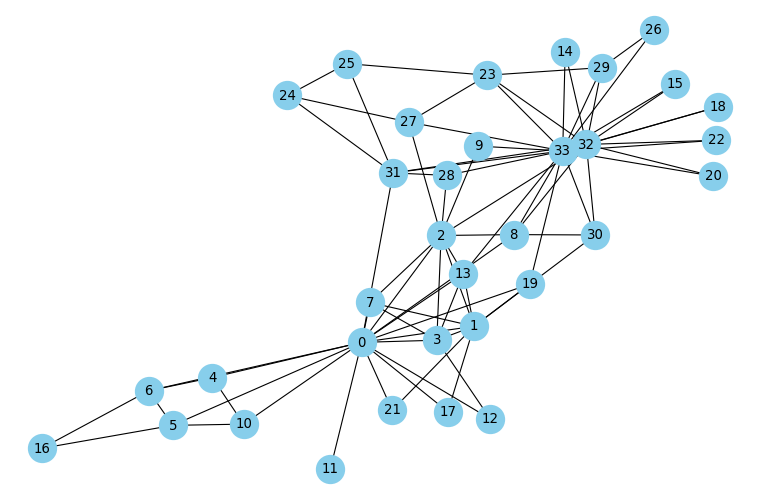

In [295]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
nx.draw_networkx(G_karate, with_labels=True, node_size=500,node_color="skyblue", linewidths=4)
plt.axis('off')
plt.show()

In [72]:
! pip install python-louvain
import community as community_louvain
import networkx.algorithms.community as nxcom

  Created wheel for python-louvain: filename=python_louvain-0.14-py3-none-any.whl size=9291 sha256=99e562f2964d28148b55d9a59914cf8d4a5ae94b4b9716e39a76a907ced080eb
  Stored in directory: /Users/valentindanchev/Library/Caches/pip/wheels/22/f9/ce/591ffa9b16851da50ca337c9ecfd44d79a7b87fcbd2a7a0021
Successfully built python-louvain


In [291]:
partition = community_louvain.best_partition(G_karate,resolution=1)
list(partition.values())

[0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 2,
 2,
 1,
 0,
 0,
 0,
 2,
 2,
 1,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 3,
 3,
 2,
 2,
 3,
 2,
 2,
 3,
 2,
 2]

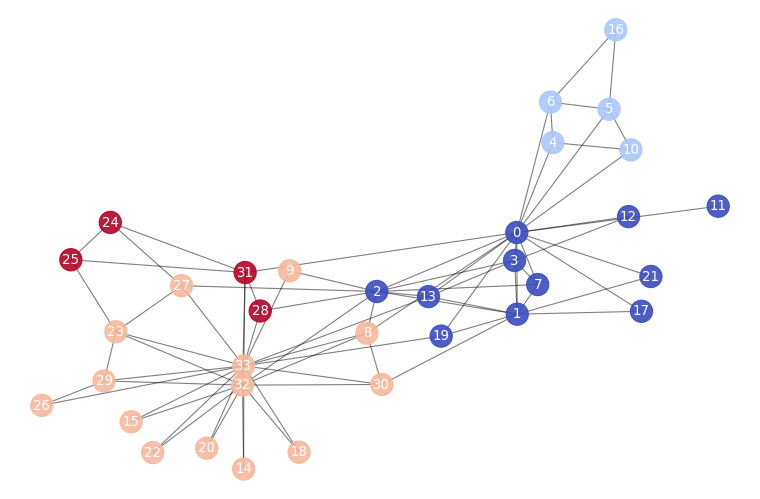

In [293]:
import matplotlib.cm as cm

# draw the graph
position = nx.spring_layout(G)
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# color the nodes according to their partition
cmap = cm.get_cmap('coolwarm', max(partition.values()) + 1)
nx.draw_networkx_nodes(G_karate, position, partition.keys(), node_size=400,
                        cmap=cmap, node_color=list(partition.values()),alpha=0.9)
nx.draw_networkx_edges(G_karate, position, alpha=0.5)

nx.draw_networkx_labels(G_karate, position, {x: x for x in G_karate.nodes()}, font_size=12, font_color='white')

plt.axis('off')
plt.show()

### The sections below draw on [Edward Platt's Network Science with Python and NetworkX Quick Start Guide](Network-Science-with-Python-and-NetworkX-Quick-Start-Guide/Chapter07/Chapter_07.ipynb)  

In [243]:
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1
            
def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0
            
            
def get_color(i, r_off=1, g_off=1, b_off=1):
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

### [Girvan–Newman edge betweenness algorithm](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html)

In [273]:
# Run Girvan–Newman edge betweenness algorithm detects 
# Detects communities by progressively removing highest betweenness edges from the original network 
result = nxcom.girvan_newman(G_karate)
communities = next(result)
len(communities)

2

In [274]:
# Examine the communities
communities

({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
 {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})

In [275]:
# Set node and edge communities
set_node_community(G_karate, communities)
set_edge_community(G_karate)

In [276]:
# Set community color for nodes
node_color = [get_color(G_karate.nodes[v]['community']) for v in G_karate.nodes]

# Set community color for internal edges
external = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] > 0]
internal_color = [get_color(G_karate.edges[e]['community']) for e in internal]

In [277]:
# Set node and edge communities
set_node_community(G_karate, communities)
set_edge_community(G_karate)

# Set community color for nodes
node_color = [get_color(G_karate.nodes[v]['community']) for v in G_karate.nodes]

# Set community color for internal edges
external = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] > 0]
internal_color = [get_color(G_karate.edges[e]['community']) for e in internal]

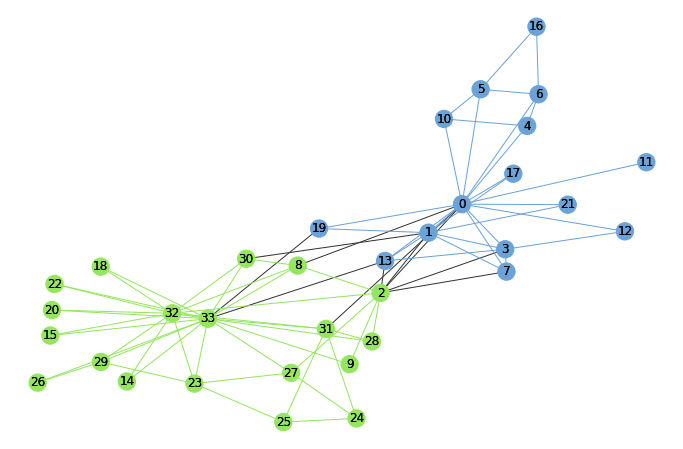

In [278]:
figure(num=None, figsize=(12, 8))

karate_pos = nx.spring_layout(G_karate)
# Draw external edges
nx.draw_networkx(
    G_karate,
    pos=karate_pos,
    node_size=0,
    edgelist=external,
    edge_color="#333333")
# Draw nodes and internal edges
nx.draw_networkx(
    G_karate,
    pos=karate_pos,
    node_color=node_color,
    edgelist=internal,
    edge_color=internal_color)
plt.axis('off')
plt.show()

### [Clauset-Newman-Moore greedy modularity maximization.](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html)

In [279]:
# Find the communities
communities = sorted(nxcom.greedy_modularity_communities(G_karate), key=len, reverse=True)
# Count the communities
len(communities)

3

In [280]:
# Set node and edge communities
set_node_community(G_karate, communities)
set_edge_community(G_karate)

# Set community color for nodes
node_color = [get_color(G_karate.nodes[v]['community']) for v in G_karate.nodes]

# Set community color for internal edges
external = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] > 0]
internal_color = [get_color(G_karate.edges[e]['community']) for e in internal]

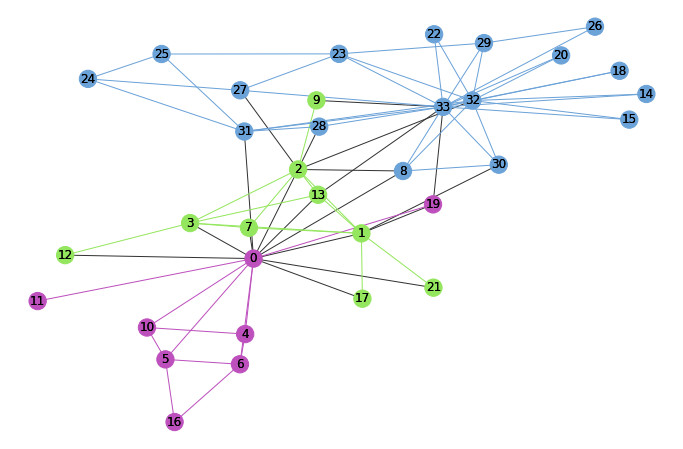

In [281]:
figure(num=None, figsize=(12, 8))

karate_pos = nx.spring_layout(G_karate)
# Draw external edges
nx.draw_networkx(
    G_karate,
    pos=karate_pos,
    node_size=0,
    edgelist=external,
    edge_color="#333333")
# Draw nodes and internal edges
nx.draw_networkx(
    G_karate,
    pos=karate_pos,
    node_color=node_color,
    edgelist=internal,
    edge_color=internal_color)

plt.axis('off')
plt.show()